## Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ML and data
import pandas as pd
from sklearn.model_selection import train_test_split

#NLTK preprocessing
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# classifier training and evaluation
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
# Download NLTK datasets
nltk.download('punkt') #
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## Loading the data

In [7]:
data_path = '/content/drive/MyDrive/Ironhack Assignments/NLP Project/dataset/data.csv'
data = pd.read_csv(data_path)

In [8]:
data

,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...,...
39937,0,THIS IS NOT A JOKE! Soros-Linked Group Has Pla...,"The Left has been organizing for decades, and ...",left-news,"Sep 22, 2016"
39938,0,THE SMARTEST WOMAN In Politics: “How Trump Can...,Monica Crowley offers some of the most brillia...,left-news,"Sep 22, 2016"
39939,0,BREAKING! SHOCKING VIDEO FROM CHARLOTTE RIOTS:...,Protest underway in Charlotte: Things got com...,left-news,"Sep 21, 2016"
39940,0,BREAKING! Charlotte News Station Reports Cops ...,"Local Charlotte, NC news station WSOCTV is rep...",left-news,"Sep 21, 2016"


## Data Preprocessing 1

In [9]:
data.drop(columns=['date', 'subject'],inplace=True)
data

,label,title,text
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...
...,...,...,...
39937,0,THIS IS NOT A JOKE! Soros-Linked Group Has Pla...,"The Left has been organizing for decades, and ..."
39938,0,THE SMARTEST WOMAN In Politics: “How Trump Can...,Monica Crowley offers some of the most brillia...
39939,0,BREAKING! SHOCKING VIDEO FROM CHARLOTTE RIOTS:...,Protest underway in Charlotte: Things got com...
39940,0,BREAKING! Charlotte News Station Reports Cops ...,"Local Charlotte, NC news station WSOCTV is rep..."


## Data Splitting

Data splitting into test and train: If you preprocess before splitting, your preprocessing steps (like fitting a vectorizer, TF-IDF, etc.) will “see” the test data, causing data leakage and giving you unrealistically high performance.

In [10]:
data['combined_text'] = data['text'] + data['title']
X = data['combined_text']
y = data['label']

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(31953,) (7989,)


In [11]:
X_train.head(50)

,combined_text
33231,Crooked lying Hillary MUST SEE: House Oversigh...
36761,Justice Scalia appeared to be in good health p...
29035,A University of North Texas student is in crit...
31791,#FireBenStein FOX NEWS’ BEN STEIN Calls Presi...
3419,"WASHINGTON (Reuters) - Robert Mueller, the spe..."
15101,BERLIN (Reuters) - German parties cited progre...
37936,Lawrence O Donnell had a really bad night on A...
39711,This is hands down the best commentary yet on ...
22787,Public pressure is mounting on Congressional l...
22752,When it comes to how shameless the Trump famil...


## Data Preprocessing 2

In [12]:
def preprocess_text(text: str):
    s = text.lower()             #conversion to lower text
    s = re.sub(r"^b['\"]", "", s) #remove prefixed b' or b"
    s = re.sub(r"[^a-z\s]", " ", s) #remove special chars & numbers (keep spaces and letters)
    s = re.sub(r"\b[a-z]\b", " ", s) #remove single characters
    s = re.sub(r"^[a-z]\s+", " ", s) #remove single character from start (redundant but explicit)
    s = re.sub(r"\s+", " ", s).strip() #collapse multiple spaces
    return s

X_train_clean = X_train.apply(preprocess_text)
X_test_clean  = X_test.apply(preprocess_text)

In [13]:
X_train_clean.head(50)

,combined_text
33231,crooked lying hillary must see house oversight...
36761,justice scalia appeared to be in good health p...
29035,university of north texas student is in critic...
31791,firebenstein fox news ben stein calls presiden...
3419,washington reuters robert mueller the special ...
15101,berlin reuters german parties cited progress o...
37936,lawrence donnell had really bad night on augus...
39711,this is hands down the best commentary yet on ...
22787,public pressure is mounting on congressional l...
22752,when it comes to how shameless the trump famil...


## NLP Data Processing

In [14]:
# Keep common negations
STOPWORDS = set(stopwords.words('english')) - {'no', 'nor', 'not'}
LEMMATIZER = WordNetLemmatizer()

def _wn_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    if treebank_tag.startswith('V'):
        return wordnet.VERB
    if treebank_tag.startswith('N'):
        return wordnet.NOUN
    if treebank_tag.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN

In [15]:
def nlp_preprocess_text(text: str):
    tokens = word_tokenize(text)                          # tokenize
    tokens = [t for t in tokens if t not in STOPWORDS]    # remove stopwords
    pos_tags = pos_tag(tokens)                            # lemmatize with POS
    lemmas = [LEMMATIZER.lemmatize(w, _wn_pos(p)) for w, p in pos_tags]

    return lemmas

# Apply to splits
X_train_clean2 = X_train_clean.apply(nlp_preprocess_text)
X_test_clean2  = X_test_clean.apply(nlp_preprocess_text)

In [16]:
X_train_clean2

,combined_text
33231,"[crook, lying, hillary, must, see, house, over..."
36761,"[justice, scalia, appear, good, health, prior,..."
29035,"[university, north, texas, student, critical, ..."
31791,"[firebenstein, fox, news, ben, stein, call, pr..."
3419,"[washington, reuters, robert, mueller, special..."
...,...
33001,"[october, radical, muslim, state, senator, jam..."
13185,"[berlin, reuters, german, police, monday, inve..."
1334,"[mexico, city, reuters, mexico, remain, within..."
32958,"[trump, actually, say, police, amaze, local, p..."


## Vectorization

ML models can’t work directly with text — they need fixed-size numerical vectors.
Vectorization is the mapping from a sequence of words → a set of numerical values.

### TF-IDF (Term Frequency – Inverse Document Frequency)



Like BOW, but gives higher weight to words that are unique to a document and lower weight to common words.

Good for text classification tasks (like fake news detection) because it reduces the influence of very frequent but uninformative words.

In [17]:

def tfidf_vectorize(X_train_tokens, X_test_tokens):
    X_train_ready = X_train_tokens.apply(lambda toks: " ".join(toks))
    X_test_ready  = X_test_tokens.apply(lambda toks: " ".join(toks))
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train_ready)
    X_test_tfidf  = vectorizer.transform(X_test_ready)
    return X_train_tfidf, X_test_tfidf, vectorizer

X_train_tfidf, X_test_tfidf, tfidf_vectorizer = tfidf_vectorize(X_train_clean2, X_test_clean2)
print("Train TF-IDF shape:", X_train_tfidf.shape)
print("Test TF-IDF shape:", X_test_tfidf.shape)


Train TF-IDF shape: (31953, 91975)
Test TF-IDF shape: (7989, 91975)


In [18]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4865974 stored elements and shape (31953, 91975)>

## Classifier Training

### Linear SVM (LinearSVC)

Why Linear SVM


*   Text data is high‑dimensional and sparse → linear margins work great.

*   LinearSVC is usually stronger and more robust than Naive Bayes on varied news text.

*   It’s fast, handles large vocabularies well, and needs minimal tuning


In [19]:


# Train Linear SVM
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train_tfidf, y_train)

# Predictions
y_train_pred = svm_clf.predict(X_train_tfidf)
y_test_pred  = svm_clf.predict(X_test_tfidf)

# Metrics
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test  Accuracy:", accuracy_score(y_test,  y_test_pred))
print("Train F1:", f1_score(y_train, y_train_pred, average="weighted"))
print("Test  F1:", f1_score(y_test,  y_test_pred,  average="weighted"))

# Detailed report (test)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, digits=4))

# Confusion matrix (test)
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))

# Compare original vs predicted for test set
comparison_df = pd.DataFrame({
    "Original": y_test.values,
    "Predicted": y_test_pred
}).reset_index(drop=True)

print("\nSample comparison (first 20 rows):")
print(comparison_df.head(20))


Train Accuracy: 0.9995618564767002
Test  Accuracy: 0.9937413944173238
Train F1: 0.9995618563925895
Test  F1: 0.9937413967707687

Classification Report (Test):
              precision    recall  f1-score   support

           0     0.9927    0.9947    0.9937      3989
           1     0.9947    0.9928    0.9937      4000

    accuracy                         0.9937      7989
   macro avg     0.9937    0.9937    0.9937      7989
weighted avg     0.9937    0.9937    0.9937      7989

Confusion Matrix (Test):
[[3968   21]
 [  29 3971]]

Sample comparison (first 20 rows):
    Original  Predicted
0          1          1
1          1          1
2          0          0
3          1          1
4          0          0
5          0          0
6          0          0
7          1          1
8          1          1
9          0          0
10         0          0
11         0          0
12         1          1
13         1          1
14         1          1
15         1          1
16         0      

### LogisticRegression

In [20]:


# Train Logistic Regression
log_clf = LogisticRegression(
    solver='liblinear',      # good for small to medium sparse datasets
    max_iter=1000,
    random_state=42
)
log_clf.fit(X_train_tfidf, y_train)

# Predictions
y_train_pred = log_clf.predict(X_train_tfidf)
y_test_pred  = log_clf.predict(X_test_tfidf)

# Metrics
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test  Accuracy:", accuracy_score(y_test,  y_test_pred))
print("Train F1:", f1_score(y_train, y_train_pred, average="weighted"))
print("Test  F1:", f1_score(y_test,  y_test_pred,  average="weighted"))

# Classification report (test)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred, digits=4))

# Confusion matrix (test)
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))


Train Accuracy: 0.991456201295653
Test  Accuracy: 0.9833521091500813
Train F1: 0.991456119320347
Test  F1: 0.9833519604691211

Classification Report (Test):
              precision    recall  f1-score   support

           0     0.9856    0.9809    0.9833      3989
           1     0.9811    0.9858    0.9834      4000

    accuracy                         0.9834      7989
   macro avg     0.9834    0.9833    0.9834      7989
weighted avg     0.9834    0.9834    0.9834      7989

Confusion Matrix (Test):
[[3913   76]
 [  57 3943]]


## Confusion matrix visulization

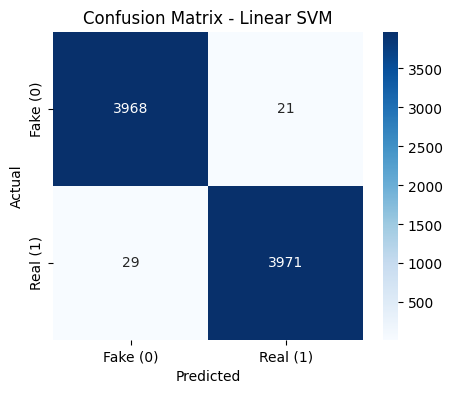

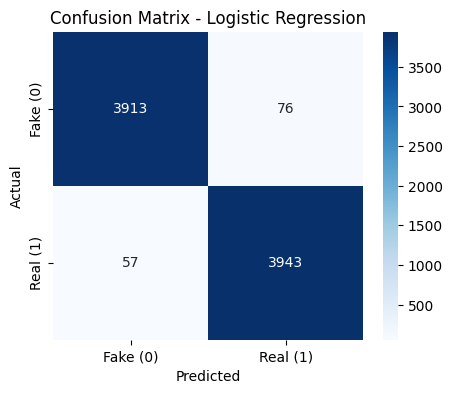

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fake (0)', 'Real (1)'],
                yticklabels=['Fake (0)', 'Real (1)'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot for Linear SVM
plot_conf_matrix(y_test, svm_clf.predict(X_test_tfidf), "Confusion Matrix - Linear SVM")

# Plot for Logistic Regression
plot_conf_matrix(y_test, log_clf.predict(X_test_tfidf), "Confusion Matrix - Logistic Regression")


## Saving the SVM model

In [22]:
import joblib

# Save the trained SVM model
joblib.dump(svm_clf, "fake_news_svm_model.pkl")

# Save the TF-IDF vectorizer as well
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


## Validation dataset

In [23]:
val_data_path = '/content/drive/MyDrive/Ironhack Assignments/NLP Project/dataset/validation_data.csv'
validation_data = pd.read_csv(val_data_path)

## Data Preprocessing1

In [26]:
validation_data['combined_text'] = validation_data['text'] + validation_data['title']

## Data Preprocessing 2

In [27]:
val_combined_text_clean = validation_data['combined_text'].apply(preprocess_text)

## NLP Data Processing

In [28]:
val_combined_text_clean2 = val_combined_text_clean.apply(nlp_preprocess_text)


## Loading the model

In [29]:
svm_loaded = joblib.load("fake_news_svm_model.pkl")
tfidf_loaded = joblib.load("tfidf_vectorizer.pkl")

## Vectorization - TF - IDF

In [30]:
X_val_tfidf = val_combined_text_clean2.apply(lambda toks: " ".join(toks))
X_val_tfidf = tfidf_loaded.transform(X_val_tfidf)

## Prediction of label using validation data

In [31]:
validation_data['label'] = svm_loaded.predict(X_val_tfidf)

In [32]:
validation_data_final = validation_data[['label', 'title', 'text', 'subject', 'date']]


## Saving to csv

In [33]:
validation_data_final.to_csv("validation_data_predicted.csv", index=False)

print("Predictions saved to validation_data_predicted.csv")

Predictions saved to validation_data_predicted.csv
